In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import re
import numpy as np

In [3]:
def normalize(ts):
    return ts - np.min(ts)

def number_after_keyword(s, key):
    exp = key + '\d+'
    return int(re.findall(exp, s)[0].replace(key, ''))

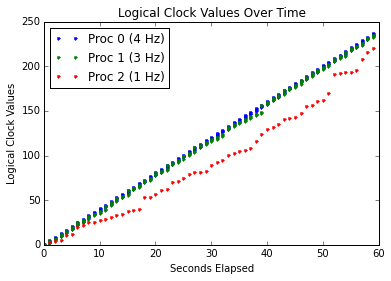

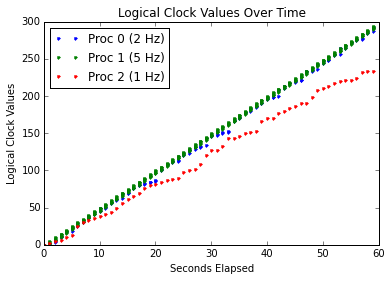

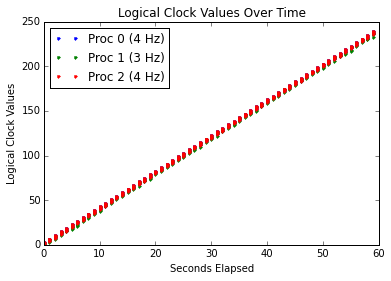

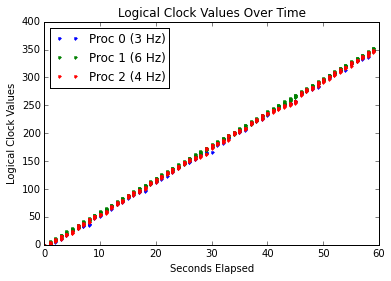

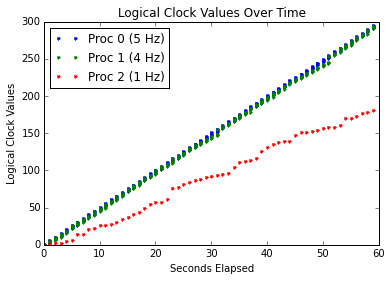

In [4]:
def plot_run(run):
    for proc in range(3):
        logfile = '%dproc%d.log' % (run, proc)
        with open(logfile, 'r') as rfile:
            lines = [line for line in rfile.readlines()]
        header, events = lines[0], lines[1:]
        clockspeed = number_after_keyword(header, 'clockspeed ')
        get_lc_time = lambda line: number_after_keyword(line, 'LC: ')
        get_sys_time = lambda line: number_after_keyword(line, 'T: ')

        lc_times = normalize(np.array(map(get_lc_time, events)))
        sys_times = normalize(np.array(map(get_sys_time, events)))

        label = 'Proc %d (%d Hz)' % (proc, clockspeed)
        plt.plot(sys_times, lc_times, '.', label=label)

    plt.legend(loc=0)
    plt.xlabel('Seconds Elapsed')
    plt.ylabel('Logical Clock Values')
    plt.title('Logical Clock Values Over Time')
    plt.show()
for run in range(5):    
    plot_run(run)

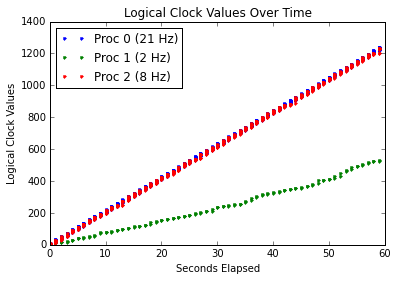

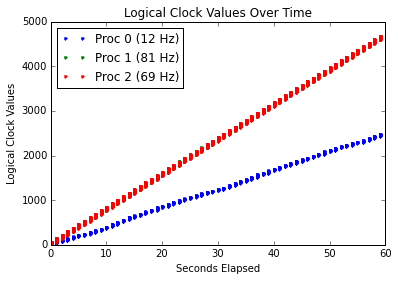

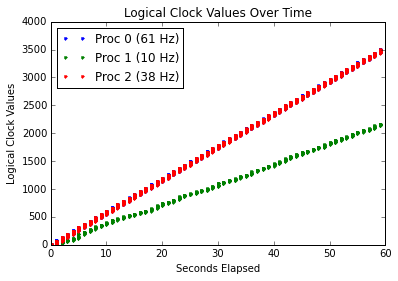

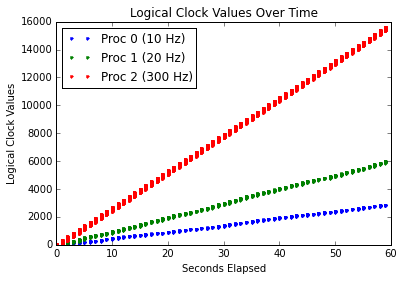

In [6]:
for run in range(10, 14):
    plot_run(run)